# THE LORENZ 63 SYSTEM WITH VARYING $\rho$

In [2]:
#conda activate tda_tutorial

import numpy as np
from scipy.integrate import solve_ivp
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation, PillowWriter
import time
import os
import tempfile

## First let's just get some code to integrate the equations and generate a simulation.

In [3]:
# Define the basic Lorenz 63 system
def lorenz63(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

## We want to visualise the attractor with various value of $\rho$

In [4]:
# Parameters for the Lorenz 63 system: these are the standard choices.
sigma = 10.0
beta = 8.0 / 3.0
# rho's are generated randomly, then sorted.
num_rho = 100
#rho_list = sorted([round(rho, 5) for rho in np.random.uniform(10, 200, num_rho).tolist()])
rho_list = list(range(11,301,1))
rho_list = [x / 10 for x in range(220, 281)]
rho_list = np.round(np.arange(24.5, 24.76, 0.001), 3).tolist()
print(rho_list)


[22.0, 22.2, 22.4, 22.6, 22.8, 23.0, 23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24.4, 24.6, 24.8, 25.0, 25.2, 25.4, 25.6, 25.8, 26.0, 26.2, 26.4, 26.6, 26.8, 27.0, 27.2, 27.4, 27.6, 27.8, 28.0, 28.2, 28.4, 28.6, 28.8, 29.0, 29.2, 29.4, 29.6, 29.8, 30.0, 30.2, 30.4, 30.6, 30.8]


In [5]:
# Define some initial condition to start at.
initial_conditions = [-1.0, 1.0, 1.0]
xyz0=initial_conditions

# Set the timestep and the total timespan to integrate over.
T = 20
time_step = 8000
t_span = np.array([0, T])
t_eval = np.linspace(*t_span, time_step)

#rho_list = list(range(10,141,10))

# Integrate the system using solve_ivp from scipy
# Create a dummy file to write the solution
with open('dummy.txt', 'w') as f:
    for rho in rho_list:
        #print(rho)
        sol = solve_ivp(lorenz63, t_span, initial_conditions, t_eval=t_eval, args=(sigma, rho, beta))
        initial_conditions = sol.y[:, -1]
        t_span = t_span + T
        t_eval = np.linspace(*t_span, time_step)
        np.savetxt(f, (sol.y).T)



KeyboardInterrupt: 

In [32]:
# Load solutions from dummy file
sols = np.loadtxt('dummy_new.txt')
print(sols.shape)
x = sols[:, 0]
y = sols[:, 1]
z = sols[:, 2]
# Normalise the dimensions.
xn = x/x.std()
yn = y/y.std()
zn = z/z.std()

#os.remove("dummy.txt") 


(8000, 4)


4

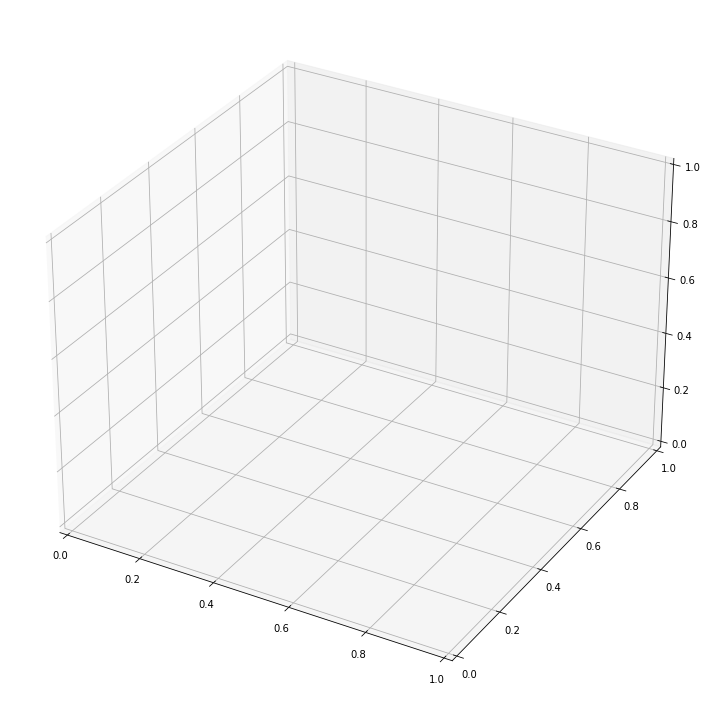

In [33]:
# Split data into blocks of block_size and create a colormap with a unique color for each block
blocks = [slice(i, i + time_step) for i in range(0, len(xn), time_step)]
num_blocks = len(blocks)
colors = plt.cm.get_cmap('Spectral', num_blocks) 
# magma, inferno, plasma, cividis, viridis, turbo, coolwarm, Spectral
block_colors = [colors(i) for i in range(num_blocks)]

# figure and plot
elev = 10
azim = -40
xlims = (-3, 3)
ylims = (-3, 3)
zlims = (0, 6)
fig = plt.figure(figsize=(10, 10));
ax = fig.add_subplot(projection='3d');
plt.tight_layout();

len(blocks)

### The code below to generate gif file since my matplotlib backend was broken.

In [34]:
# plot settings
def initialize_plot():
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_zlim(zlims)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.zaxis.set_tick_params(labelbottom=False)
    #ax.set_title(f'Lorenz `63 Integration \n initial condition={xyz0}',y=0.9, fontsize=12)
    ax.set_title(f'Lorenz `63 Integration \n initial condition={xyz0}',y=0.05, fontsize=12)
    ax.view_init(elev=elev, azim=azim)

initialize_plot()

# update the plot
def update(i):
    ax.clear()
    initialize_plot()
    block = blocks[i]
    #ax.scatter(xn[block], yn[block], zn[block], color=block_colors[i], label=f'rho={rho_list[i]}', s=0.05, alpha=1.0)
    #ax.legend(loc='lower right')
    ax.scatter(xn[block], yn[block], zn[block], color='b', label=f'rho={rho_list[i]}', s=0.1, alpha=1.0)
    #ax.legend(loc='upper right', bbox_to_anchor=(0.75, 0.1), ncol=1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.95, 0.80), labelcolor='blue')

# animation
ani = FuncAnimation(fig, update, frames=len(blocks), repeat=False)

# save the animation as a GIF
writer = PillowWriter(fps=5, metadata={'dpi': 300})
ani.save("lorenz63_integration_new.gif", writer=writer)

## Exercise 1.

Play around with giving different initial conditions, changing length of integration or timesteps etc. to get a feel for the behaviour.

If you haven't done so already, you can paly around similarly with the following interactive website: https://joshdorrington.github.io/L63_simulator/

Click anywhere on the attractor to initiate a trajectory starting there.

In [ ]:
# Parameters for the Lorenz 63 system: these are the standard choices.
sigma = 10.0
beta = 8.0 / 3.0
# rho's are generated randomly, then sorted.
num_rho = 100
#rho_list = sorted([round(rho, 5) for rho in np.random.uniform(10, 200, num_rho).tolist()])
rho_list = list(range(11,301,1))
rho_list = [x / 10 for x in range(220, 281)]
rho_list = np.round(np.arange(22, 31 , 0.2), 3).tolist()
print(rho_list)


22.0


<Figure size 432x288 with 0 Axes>

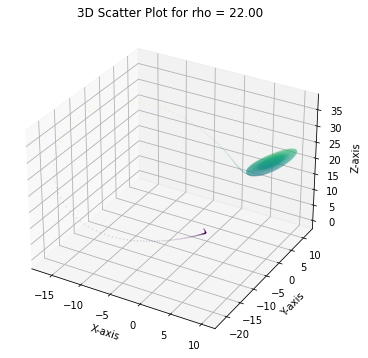

22.2


<Figure size 432x288 with 0 Axes>

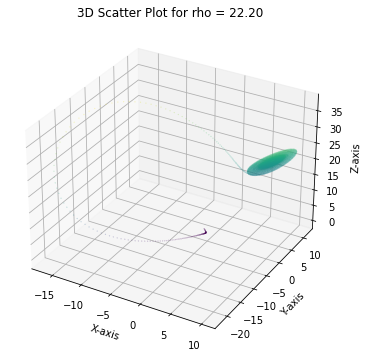

22.4


<Figure size 432x288 with 0 Axes>

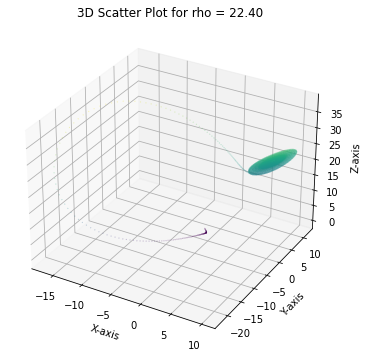

22.6


<Figure size 432x288 with 0 Axes>

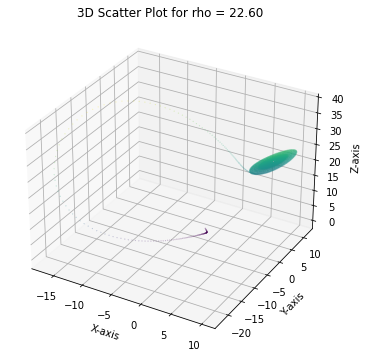

22.8


<Figure size 432x288 with 0 Axes>

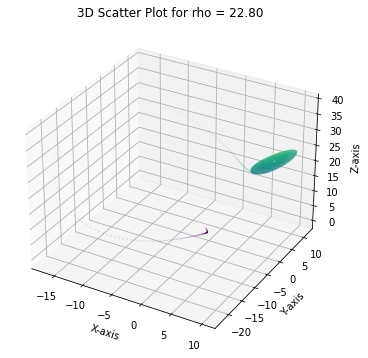

23.0


<Figure size 432x288 with 0 Axes>

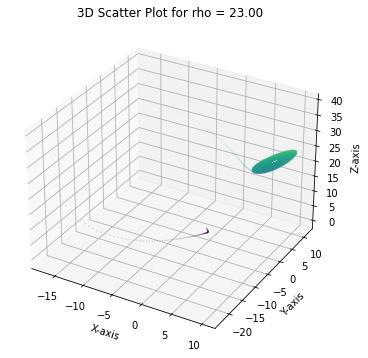

23.2


<Figure size 432x288 with 0 Axes>

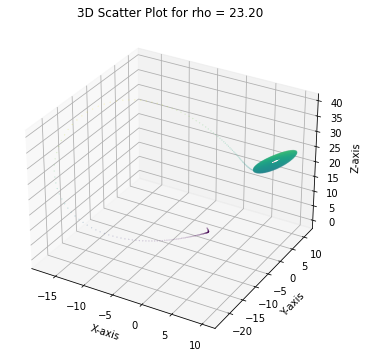

23.4


<Figure size 432x288 with 0 Axes>

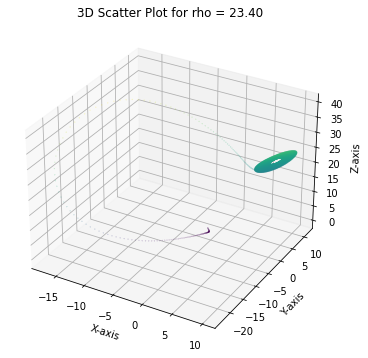

23.6


<Figure size 432x288 with 0 Axes>

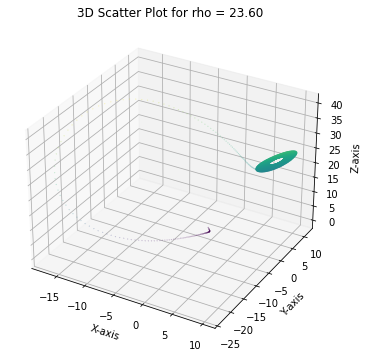

23.8


<Figure size 432x288 with 0 Axes>

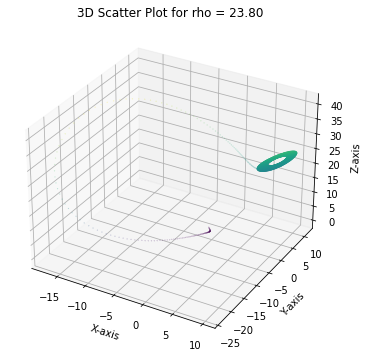

24.0


<Figure size 432x288 with 0 Axes>

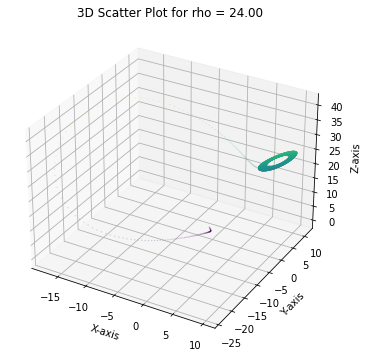

24.2


<Figure size 432x288 with 0 Axes>

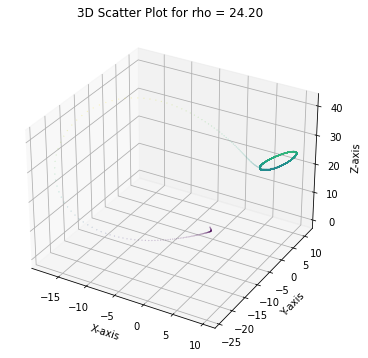

24.4


<Figure size 432x288 with 0 Axes>

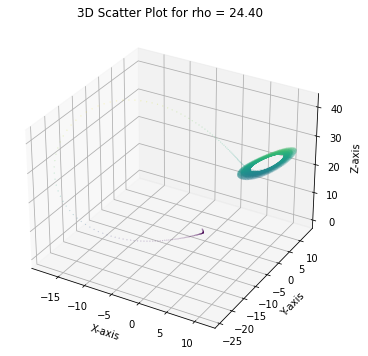

24.6


<Figure size 432x288 with 0 Axes>

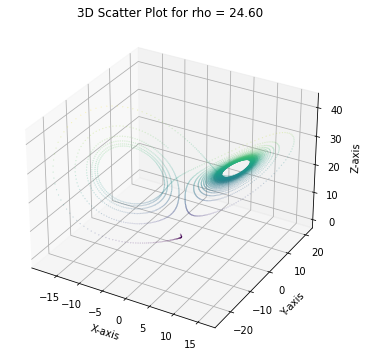

24.8


<Figure size 432x288 with 0 Axes>

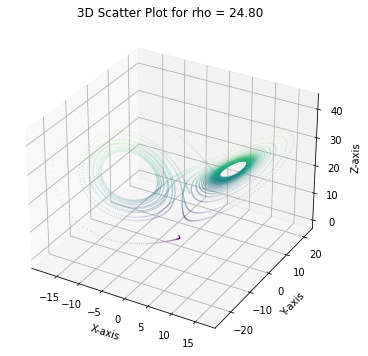

25.0


<Figure size 432x288 with 0 Axes>

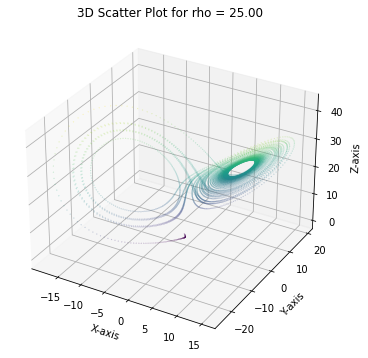

25.2


<Figure size 432x288 with 0 Axes>

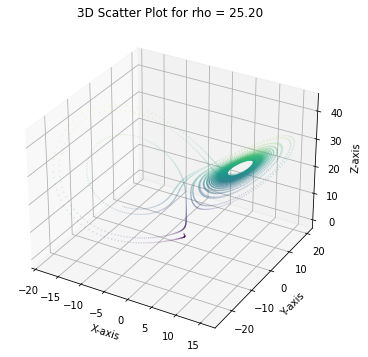

25.4


<Figure size 432x288 with 0 Axes>

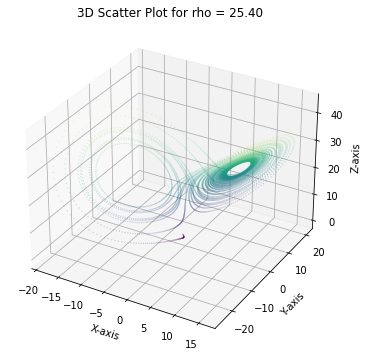

25.6


<Figure size 432x288 with 0 Axes>

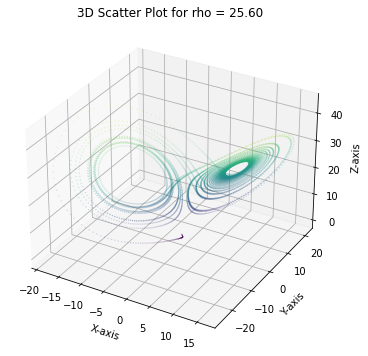

25.8


<Figure size 432x288 with 0 Axes>

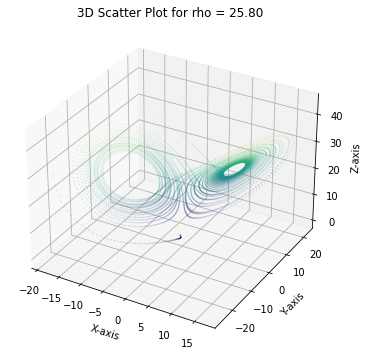

26.0


<Figure size 432x288 with 0 Axes>

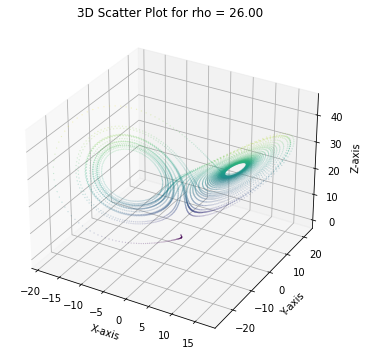

26.2


<Figure size 432x288 with 0 Axes>

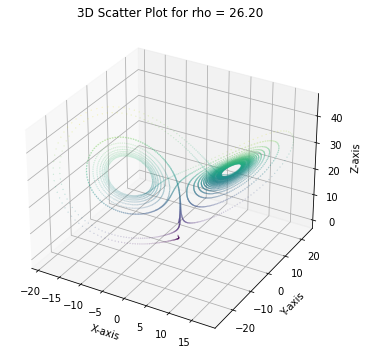

26.4


<Figure size 432x288 with 0 Axes>

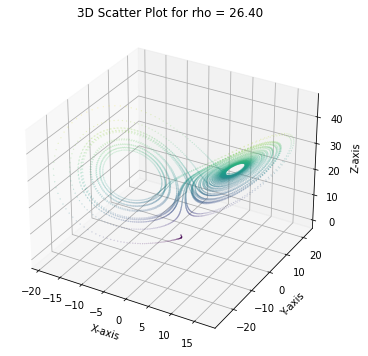

26.6


<Figure size 432x288 with 0 Axes>

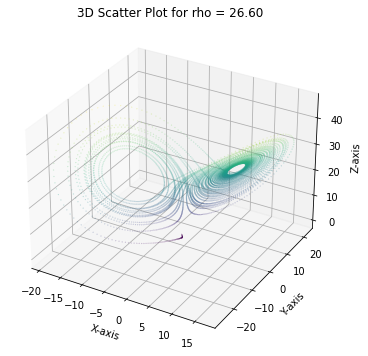

26.8


<Figure size 432x288 with 0 Axes>

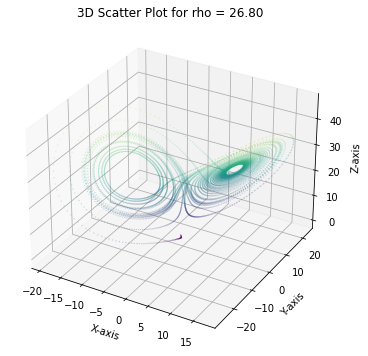

27.0


<Figure size 432x288 with 0 Axes>

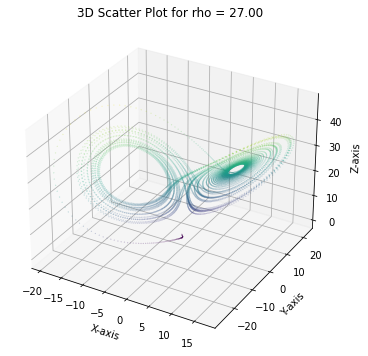

27.2


<Figure size 432x288 with 0 Axes>

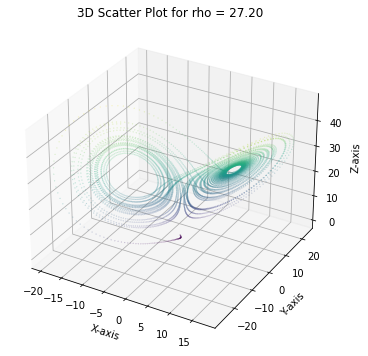

27.4


<Figure size 432x288 with 0 Axes>

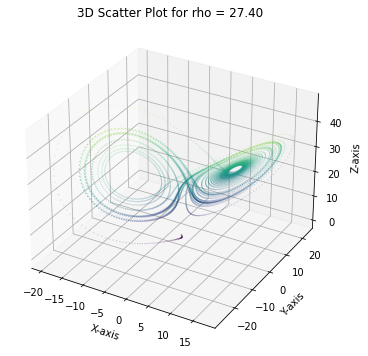

27.6


<Figure size 432x288 with 0 Axes>

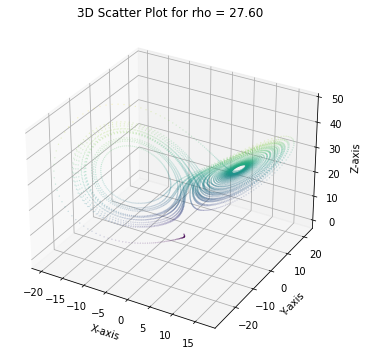

27.8


<Figure size 432x288 with 0 Axes>

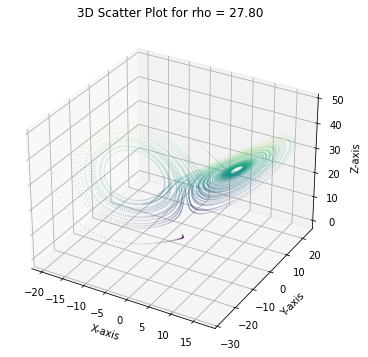

28.0


<Figure size 432x288 with 0 Axes>

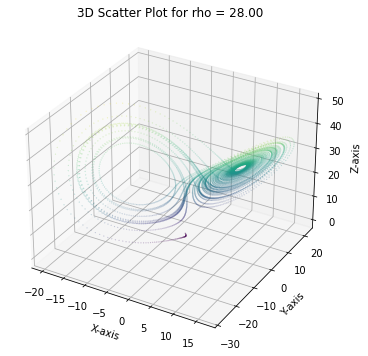

28.2


<Figure size 432x288 with 0 Axes>

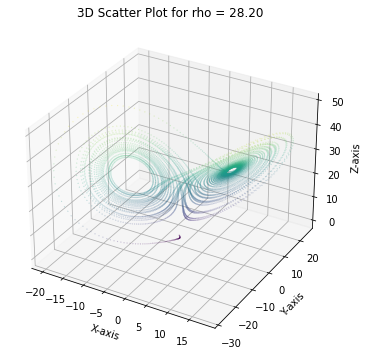

28.4


<Figure size 432x288 with 0 Axes>

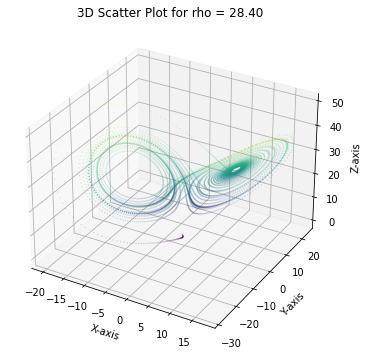

28.6


<Figure size 432x288 with 0 Axes>

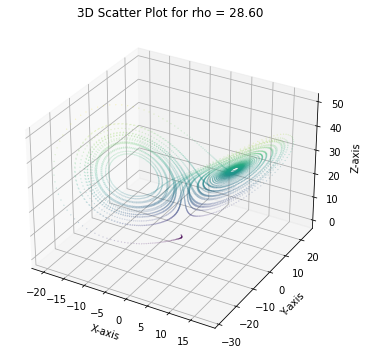

28.8


<Figure size 432x288 with 0 Axes>

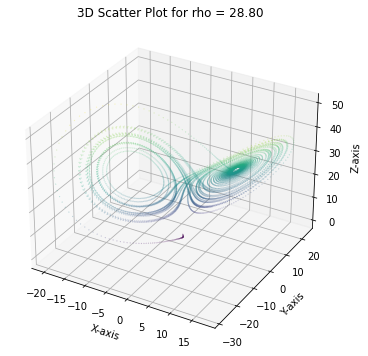

29.0


<Figure size 432x288 with 0 Axes>

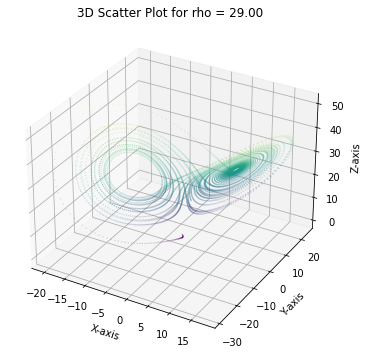

29.2


<Figure size 432x288 with 0 Axes>

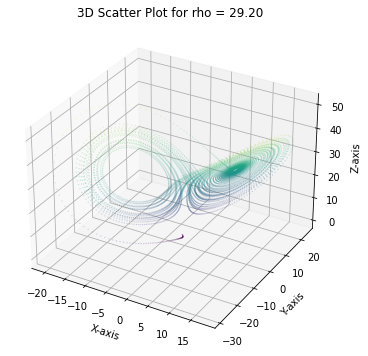

29.4


<Figure size 432x288 with 0 Axes>

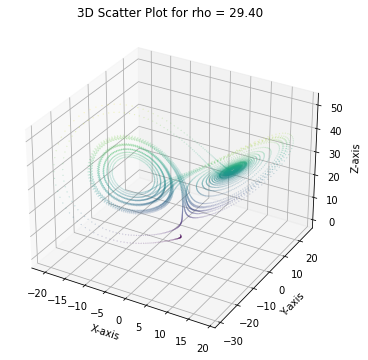

29.6


<Figure size 432x288 with 0 Axes>

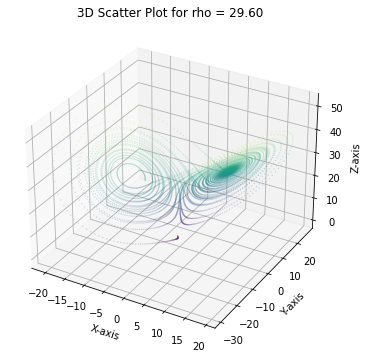

29.8


<Figure size 432x288 with 0 Axes>

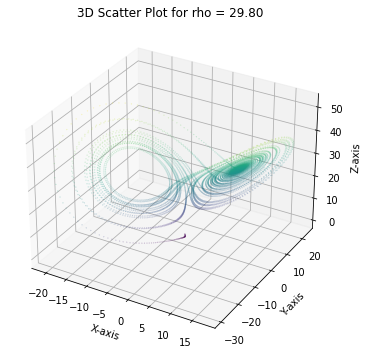

30.0


<Figure size 432x288 with 0 Axes>

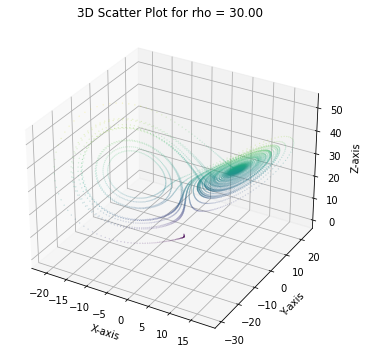

30.2


<Figure size 432x288 with 0 Axes>

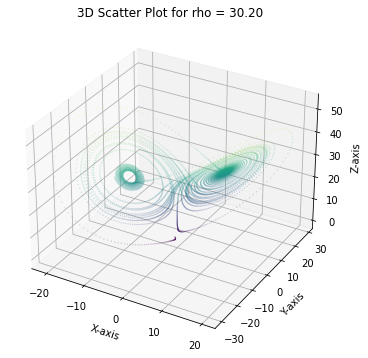

30.4


<Figure size 432x288 with 0 Axes>

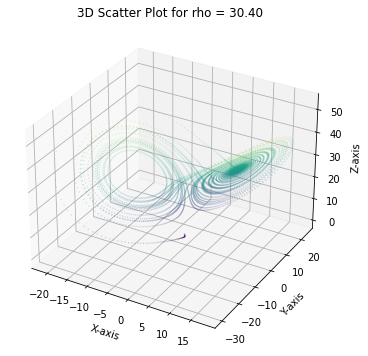

30.6


<Figure size 432x288 with 0 Axes>

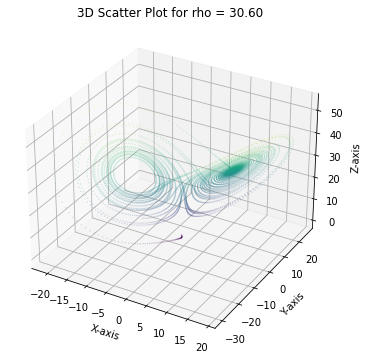

30.8


<Figure size 432x288 with 0 Axes>

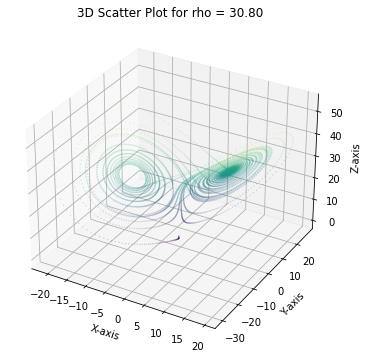

In [7]:
# Define some initial condition to start at.
initial_conditions = [-1.0,1.0,0]
xyz0=initial_conditions

# Set the timestep and the total timespan to integrate over.
T = 40
time_step = 8000
t_span = np.array([0, T])
t_eval = np.linspace(*t_span, time_step)

#rho_list = list(range(10,141,10))

# Integrate the system using solve_ivp from scipy
# Create a dummy file to write the solution

output_folder = "outputs/"
for rho in rho_list:
    filename = f"{output_folder}output_rho_{rho:.3f}.txt"
    with open(filename, 'w') as f:
        print(rho) 
        sol = solve_ivp(lorenz63, t_span, initial_conditions, t_eval=t_eval, args=(sigma, rho, beta))
        np.savetxt(f, np.column_stack(((sol.y).T, (sol.t).T)))
        
#    initial_conditions = sol.y[:, -1]
#    t_span = t_span + T
#    t_eval = np.linspace(*t_span, time_step)
#        np.savetxt(f, np.column_stack(((sol.y).T, (sol.t).T)))
    x, y, z = sol.y.T[:, 0], sol.y.T[:, 1], sol.y.T[:, 2]
    plt.clf()
    fig = plt.figure(figsize=(8, 6))    
    ax = fig.add_subplot(111, projection='3d')

    # Plot the scatter points
    scatter=ax.scatter(x, y, z, c=z, cmap='viridis',s=0.01, alpha=1.0)

    # Add labels
    ax.set_title(f"3D Scatter Plot for rho = {rho:.2f}")
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.pause(1)

# Show the plot
    png_filename = filename.replace(".txt", ".png")
    fig.savefig(png_filename, dpi=300)
    plt.close(fig)
plt.close()